In [1]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import copy
import numpy as np
import math
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
import pandas as pd
import pickle

import sys
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

sys.path.append("C:/dev/pyktrader3/")
sys.path.append("C:/dev/wtpy/")
sys.path.append("C:/dev/akshare/")
sys.path.append("C:/dev/wtdev/")

from pycmqlib3.analytics.tstool import *
from pycmqlib3.analytics.btmetrics import *
from pycmqlib3.analytics.backtest_utils import *

import pypfopt
from pypfopt import plotting
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import expected_returns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
mpl.rcParams['figure.figsize'] = (12, 8)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [8]:
# S = risk_models.CovarianceShrinkage((dpnl_df/5000000), returns_data=True, frequency=243).ledoit_wolf()
# plotting.plot_covariance(S, plot_correlation=True)

# mu = expected_returns.capm_return((dpnl_df/5000000), returns_data=True, frequency=243)
# mu.plot.barh(figsize=(8,6))

In [4]:
data_file = open('port_data_test.pkl', 'rb')
port_data = pickle.load(data_file)
data_file.close()

bt_empirics = port_data['empirics']
scen_stats = port_data['scen_stats']
scen_names = port_data['scen_names']
holdings = port_data['holdings']


In [103]:
bt_empirics['hot_test'].holdings

product,rb,hc,i,j,jm,ru,FG,cu,al,zn,sn,l,pp,v,TA,sc,m,RM,y,p,OI,a,c,CF,jd,AP,SM,eb,eg,UR,ss,lu,lh,ni
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2011-01-06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2011-01-07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2011-01-10,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
2011-01-11,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,-202288.997579,1.372945e+06,8.019894e+05,-3.826783e+05,-7.330924e+05,-3.288115e+06,2.265587e+06,-8.152418e+05,9.968863e+05,-5.651738e+05,164347.502901,9.353347e+04,-2.570103e+06,3.653613e+05,2.291580e+06,5.749105e+05,-1.448886e+06,1.191054e+06,-1.056874e+06,109878.120254,-1.436219e+06,-1.451339e+06,-4.901708e+06,-3.468355e+06,2.062051e+06,2.266987e+06,-6.414002e+04,-2.027955e+06,-3.357188e+06,-360169.128994,2.075123e+06,576976.532259,-2.341085e+06,2.515868e+06
2023-04-25,-949455.800696,-2.938490e+05,9.076924e+05,-8.824421e+05,-8.859229e+05,-4.786289e+06,1.937016e+06,-1.417347e+06,-4.068340e+05,-2.257694e+06,-343526.444681,-1.771653e+06,-1.685025e+06,-1.958536e+06,1.255546e+06,1.991625e+05,-1.270801e+06,1.877153e+06,-9.547801e+05,592648.802860,-1.579212e+06,-3.569950e+05,-3.555137e+06,-3.224935e+06,1.806798e+06,2.411791e+06,1.236066e+06,-2.822331e+06,-2.624297e+06,-417321.854210,1.899844e+06,316195.956753,-1.966304e+06,2.679064e+06
2023-04-26,-356950.871274,1.190937e+06,1.112803e+06,-1.496574e+06,-9.143311e+05,-3.045893e+06,2.794548e+06,1.282306e+05,-1.220539e+06,-2.434678e+06,-429937.882951,2.840063e+05,-3.957819e+05,-1.390664e+06,1.608990e+06,2.691813e+05,-1.121512e+06,2.014509e+06,-1.567799e+06,38047.981468,-1.611105e+06,2.242142e+04,-5.138244e+05,-3.149439e+06,9.118310e+05,3.980933e+06,1.289945e+06,-4.100320e+06,-3.493161e+06,-499660.700828,1.703133e+06,401891.725846,-2.288957e+06,2.781220e+06


In [5]:
scen_start = pd.to_datetime('2011-01-01')
df_list = []

run_key = 'hot_test'
for scen_name, scen_stat in zip(scen_names[run_key], scen_stats[run_key]):
    #scen_stat['portfolio_cumpnl'][scen_start:].plot(title=scen_name)
    #plt.show()
    ts = scen_stat['portfolio_pnl'][scen_start:]    
    df_list.append(ts)
dpnl_df = pd.concat(df_list, axis=1, join='outer').fillna(0)
dpnl_df.columns = scen_names[run_key]
#scen_corr = dpnl_df.corr()

strat_list = scen_names[run_key]
print(strat_list)

['tscarry-ryieldnmb-1-122-1', 'tscarry-ryieldqtl-1-20-1', 'tscarry-ryieldqtl-1-60-1', 'tscarry-ryieldqtl-1-244-1', 'tscarry-basmomnma-20-122-1', 'tscarry-basmomnma-60-122-1', 'tscarry-basmomnma-120-122-1', 'tscarry-basmomnma-180-122-1', 'tscarry-basmomqtl-120-20-1', 'tscarry-basmomqtl-240-20-1', 'xscarry-rank-ryieldnma-1-122-1', 'xscarry-rank-basmomnma-20-122-1', 'xscarry-rank-basmomnma-100-122-1', 'xscarry-rank-basmomnma-170-122-1', 'tsmom-hlbrk-20-1-10', 'tsmom-hlbrk-61-1-10', 'tsmom-hlbrk-244-1-10', 'tsmom-macdnma-8-160-5', 'tsmom-macdnma-16-160-5', 'tsmom-macdnma-24-160-5', 'xsmom-rank-hlbrk-20-1-1', 'xsmom-rank-hlbrk-61-1-1', 'xsmom-rank-hlbrk-244-1-1', 'xsmom-rank-momnma-10-10-1', 'xsmom-rank-momnma-130-120-1', 'xsmom-rank-momnma-240-60-1', 'custom-hc_rb_diff-20-122-1', 'custom-leader_lagger-40-122-1']


In [47]:
strat_list = scen_names[run_key]
cutoff = '2018-01-01'
sector_mapper = {}
for strat in strat_list:
    strat_split = strat.split('-')
    strat_type = strat_split[0]
    strat_fact = strat_split[1]
    if strat_type in ['tsmom', 'xsmom']:
        sector_mapper[strat] = strat_type
    elif strat_type == 'tscarry':
        if strat_fact[:6] == 'ryield':
            sector_mapper[strat] = 'tsbasis'
        elif strat_fact[:6] == 'basmom':
            sector_mapper[strat] = 'tsbasmom'
    elif strat_type == 'xscarry':
        strat_fact = strat_split[2]
        if strat_fact[:6] == 'ryield':
            sector_mapper[strat] = 'xsbasis'
        elif strat_fact[:6] == 'basmom':
            sector_mapper[strat] = 'xsbasmom'
    elif strat_type == 'custom':
        if strat_fact == 'leader_lagger':
            sector_mapper[strat] = 'macro2'
        elif strat_fact == 'hc_rb_diff':
            sector_mapper[strat] = 'macro1'
    else:
        print("unsupported mapping %s" % (strat))

#print(sector_mapper)

pnl_df = (dpnl_df/5000000).copy()
pnl_df.columns = pd.MultiIndex.from_tuples([(col, sector_mapper[col]) for col in pnl_df.columns], names=['strat', 'sector'])

unitary_df = pnl_df /(pnl_df[cutoff:].std())

unitary_df

strat,tscarry-ryieldnmb-1-122-1,tscarry-ryieldqtl-1-20-1,tscarry-ryieldqtl-1-60-1,tscarry-ryieldqtl-1-244-1,tscarry-basmomnma-20-122-1,tscarry-basmomnma-60-122-1,tscarry-basmomnma-120-122-1,tscarry-basmomnma-180-122-1,tscarry-basmomqtl-120-20-1,tscarry-basmomqtl-240-20-1,xscarry-rank-ryieldnma-1-122-1,xscarry-rank-basmomnma-20-122-1,xscarry-rank-basmomnma-100-122-1,xscarry-rank-basmomnma-170-122-1,tsmom-hlbrk-20-1-10,tsmom-hlbrk-61-1-10,tsmom-hlbrk-244-1-10,tsmom-macdnma-8-160-5,tsmom-macdnma-16-160-5,tsmom-macdnma-24-160-5,xsmom-rank-hlbrk-20-1-1,xsmom-rank-hlbrk-61-1-1,xsmom-rank-hlbrk-244-1-1,xsmom-rank-momnma-10-10-1,xsmom-rank-momnma-130-120-1,xsmom-rank-momnma-240-60-1,custom-hc_rb_diff-20-122-1,custom-leader_lagger-40-122-1
sector,tsbasis,tsbasis,tsbasis,tsbasis,tsbasmom,tsbasmom,tsbasmom,tsbasmom,tsbasmom,tsbasmom,xsbasis,xsbasmom,xsbasmom,xsbasmom,tsmom,tsmom,tsmom,tsmom,tsmom,tsmom,xsmom,xsmom,xsmom,xsmom,xsmom,xsmom,macro1,macro2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,-0.794717,-0.884378,-1.569044,-0.214890,-0.706943,-0.263692,0.967900,-0.277040,-0.768532,-0.698007,0.214280,0.783065,1.224203,0.284525,0.277308,1.459061,0.954354,0.071352,1.118799,1.297285,-0.422393,0.306300,-0.240600,-0.526396,-0.849207,0.576313,0.121168,0.980844
2023-04-25,-1.113805,-0.450222,-1.141428,-0.026292,-0.301059,-0.997898,0.253786,-0.611006,-0.636722,1.067782,-0.261075,0.113115,0.011050,-0.388096,0.844380,0.796375,-0.105476,0.674006,0.732918,0.536631,0.971178,0.351353,-1.048709,0.753285,-0.797854,0.029699,0.729314,0.809250


In [49]:
pnl_tenors = ['6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '10y']

perf_dict = {}
for sector in unitary_df.columns.get_level_values(1).unique():
    sector_pnl = unitary_df.loc[:, unitary_df.columns.get_level_values(1) == sector].mean(axis=1)
    res = calc_perf_by_tenors(sector_pnl, pnl_tenors, metric='sharpe')
    perf_dict[sector] = res

perf_df = pd.DataFrame(perf_dict)
perf_df

,tsbasis,tsbasmom,xsbasis,xsbasmom,tsmom,xsmom,macro1,macro2
sharpe_6m,-0.125183,0.372352,-0.493241,0.876483,-1.563762,-2.265272,2.697716,0.574141
sharpe_1y,0.089339,0.896619,-0.062023,1.240478,-0.723904,-1.001923,2.650172,1.148961
sharpe_2y,0.965057,1.358038,0.587669,1.283881,0.468535,0.185736,1.495918,1.443761
sharpe_3y,1.859434,2.117973,1.378121,1.990404,1.442226,1.181494,2.304443,2.202163
sharpe_4y,2.199245,1.998839,1.350156,1.795439,1.274297,1.256132,2.277285,1.978824
sharpe_5y,2.029284,1.956907,1.553632,1.853496,1.114566,1.152472,2.017324,1.937320
sharpe_6y,1.846966,1.890177,1.594182,1.811051,0.957106,1.089023,1.724427,1.794536
sharpe_7y,1.942116,2.036268,1.566006,1.786038,0.956236,0.974119,1.662833,1.709042
sharpe_8y,1.786392,1.869042,1.546437,1.817677,1.123573,1.032573,1.708342,1.873830
sharpe_10y,1.925262,1.955410,1.604927,1.867731,1.136845,1.243084,1.586570,1.767288


strat                                     tscarry-ryieldnmb-1-122-1  \
sector                                                      tsbasis   
strat                            sector                               
tscarry-ryieldnmb-1-122-1        tsbasis                   1.000000   
tscarry-ryieldqtl-1-20-1         tsbasis                   0.452294   
tscarry-ryieldqtl-1-60-1         tsbasis                   0.552924   
tscarry-ryieldqtl-1-244-1        tsbasis                   0.615275   
tscarry-basmomnma-20-122-1       tsbasmom                  0.487800   
tscarry-basmomnma-60-122-1       tsbasmom                  0.530741   
tscarry-basmomnma-120-122-1      tsbasmom                  0.405145   
tscarry-basmomnma-180-122-1      tsbasmom                  0.328269   
tscarry-basmomqtl-120-20-1       tsbasmom                  0.355052   
tscarry-basmomqtl-240-20-1       tsbasmom                  0.311482   
xscarry-rank-ryieldnma-1-122-1   xsbasis                   0.683603   
xscarr

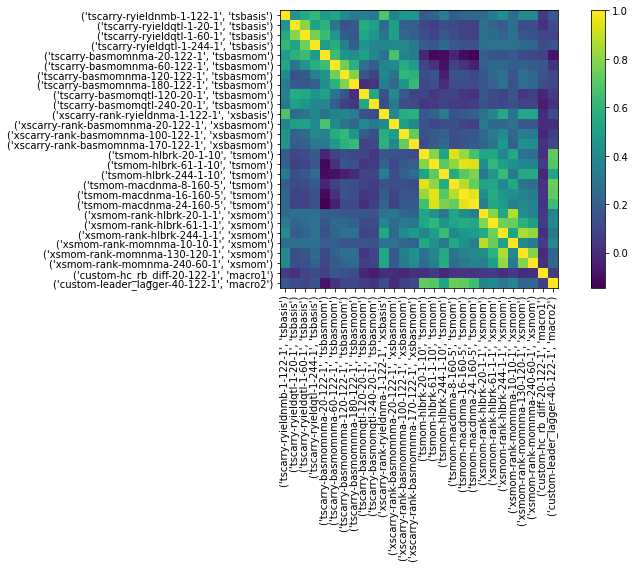

In [51]:
sample_cov = risk_models.sample_cov(unitary_df, returns_data=True, frequency=243)
plotting.plot_covariance(sample_cov, plot_correlation=True)
print(unitary_df.corr())

In [68]:
opt_weights = {}
mv_series = {}
weight_ts = pd.Series()
factor_list = ['tsbasis', 'tsbasmom', 'tsmom', 'xsbasmom', 'xsmom', 'xsbasis', 'macro1', 'macro2']
for sector in factor_list:
    sector_df = unitary_df.loc[:, unitary_df.columns.get_level_values(1) == sector]
    ew_perf = calc_perf_by_tenors(sector_df.mean(axis=1), pnl_tenors, metric='sharpe')
    if len(sector_df.columns) > 1:
        #mu = expected_returns.mean_historical_return(sector_df, returns_data=True, frequency=243)
        S = risk_models.CovarianceShrinkage(sector_df[cutoff:], returns_data=True, frequency=243).ledoit_wolf()
        #ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
        #ef.max_sharpe()
        ef = EfficientFrontier(None, S, weight_bounds=(0,1))
        ef.min_volatility()
        weights = ef.clean_weights()
        opt_weights[sector] = weights
        wdf = pd.Series(weights)
        mv_pnl = sector_df.multiply(wdf).sum(axis=1)
    else:
        wdf = pd.Series(1, index=sector_df.columns)
        mv_pnl = sector_df.mean(axis=1) 
    weight_ts = weight_ts.append(wdf)
    mv_perf = calc_perf_by_tenors(mv_pnl, pnl_tenors, metric='sharpe')
    print(f"{sector} weights:\n{weights}\n equal weight: {ew_perf}\n min var: {mv_perf}\n")        
    mv_series[sector] = mv_pnl
        
mv_series = pd.DataFrame(mv_series)
mv_series

tsbasis weights:
OrderedDict([(('tscarry-ryieldnmb-1-122-1', 'tsbasis'), 0.35217), (('tscarry-ryieldqtl-1-20-1', 'tsbasis'), 0.37504), (('tscarry-ryieldqtl-1-60-1', 'tsbasis'), 0.0), (('tscarry-ryieldqtl-1-244-1', 'tsbasis'), 0.27279)])
 equal weight: sharpe_6m    -0.125183
sharpe_1y     0.089339
sharpe_2y     0.965057
sharpe_3y     1.859434
sharpe_4y     2.199245
sharpe_5y     2.029284
sharpe_6y     1.846966
sharpe_7y     1.942116
sharpe_8y     1.786392
sharpe_10y    1.925262
Name: 0, dtype: float64
 min var: sharpe_6m     0.266103
sharpe_1y     0.220063
sharpe_2y     1.134317
sharpe_3y     2.041257
sharpe_4y     2.282018
sharpe_5y     2.084336
sharpe_6y     1.933286
sharpe_7y     2.022797
sharpe_8y     1.887595
sharpe_10y    1.993162
Name: 0, dtype: float64

tsbasmom weights:
OrderedDict([(('tscarry-basmomnma-20-122-1', 'tsbasmom'), 0.0), (('tscarry-basmomnma-60-122-1', 'tsbasmom'), 0.01676), (('tscarry-basmomnma-120-122-1', 'tsbasmom'), 0.10838), (('tscarry-basmomnma-180-122-1', 'ts

,tsbasis,tsbasmom,tsmom,xsbasmom,xsmom,xsbasis,macro1,macro2
date,,,,,,,,
2011-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-01-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2023-04-24,-0.670172,-0.394615,0.709201,0.670795,-0.182639,0.214280,0.121168,0.980844
2023-04-25,-0.568272,-0.113706,0.419434,-0.094893,0.267058,-0.261075,0.729314,0.809250
2023-04-26,-0.043133,-0.065778,-0.108285,0.144235,-0.346363,0.653460,-0.021274,0.229327


<AxesSubplot:xlabel='date'>

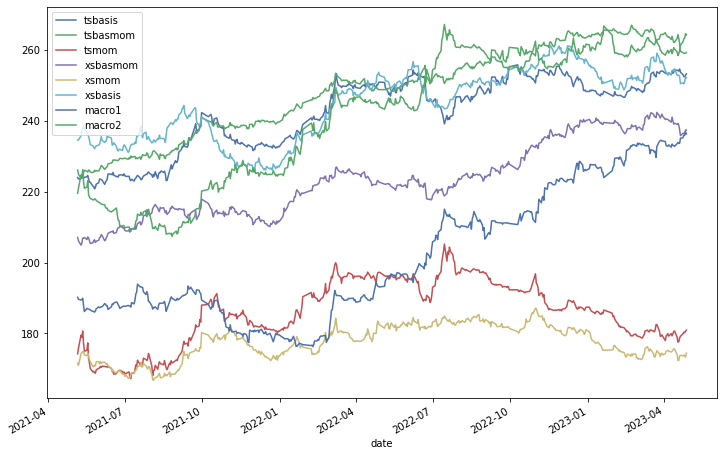

In [108]:
mv_series.cumsum()['2021-05-01':].plot()

In [73]:
weight_ts.index = pd.MultiIndex.from_tuples(weight_ts.index)
weight_ts

tscarry-ryieldnmb-1-122-1         tsbasis     0.35217
tscarry-ryieldqtl-1-20-1          tsbasis     0.37504
tscarry-ryieldqtl-1-60-1          tsbasis     0.00000
tscarry-ryieldqtl-1-244-1         tsbasis     0.27279
tscarry-basmomnma-20-122-1        tsbasmom    0.00000
tscarry-basmomnma-60-122-1        tsbasmom    0.01676
tscarry-basmomnma-120-122-1       tsbasmom    0.10838
tscarry-basmomnma-180-122-1       tsbasmom    0.32495
tscarry-basmomqtl-120-20-1        tsbasmom    0.30104
tscarry-basmomqtl-240-20-1        tsbasmom    0.24887
tsmom-hlbrk-20-1-10               tsmom       0.44371
tsmom-hlbrk-61-1-10               tsmom       0.00000
tsmom-hlbrk-244-1-10              tsmom       0.39519
tsmom-macdnma-8-160-5             tsmom       0.00000
tsmom-macdnma-16-160-5            tsmom       0.00000
tsmom-macdnma-24-160-5            tsmom       0.16111
xscarry-rank-basmomnma-20-122-1   xsbasmom    0.44612
xscarry-rank-basmomnma-100-122-1  xsbasmom    0.17438
xscarry-rank-basmomnma-170-1

In [110]:
mv_series[cutoff:].std()

tsbasis     0.824116
tsbasmom    0.697096
tsmom       0.870761
xsbasmom    0.829638
xsmom       0.800955
xsbasis     1.000000
macro1      1.000000
macro2      1.000000
dtype: float64

In [111]:
# mu = expected_returns.ema_historical_return(mv_series, returns_data=True, frequency=243, span=243*5,)
# print(mu)

mv_ts = mv_series /mv_series[cutoff:].std()
S = risk_models.CovarianceShrinkage(mv_ts[cutoff:], returns_data=True, frequency=243).ledoit_wolf()
# ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
# ef.max_sharpe()

ef = EfficientFrontier(None, S, weight_bounds=(0,1))

fact_idx = {}

for fact in factor_list:
    fact_idx[fact] = ef.tickers.index(fact)

for fact in ['tsbasis', 'tsbasmom', 'tsmom', 'xsbasmom', 'xsmom', 'xsbasis']:
    ef.add_constraint(lambda w: w[fact_idx[fact]] >= 0.1)
    ef.add_constraint(lambda w: w[fact_idx[fact]] <= 0.25)

ef.add_constraint(lambda w: w[fact_idx['macro1']] <= 0.16)
ef.add_constraint(lambda w: w[fact_idx['tsmom']] + w[fact_idx['macro2']] <= 0.24)
ef.add_constraint(lambda w: w[fact_idx['tsbasmom']] + w[fact_idx['xsbasmom']] <= 0.4)
ef.add_constraint(lambda w: w[fact_idx['tsbasis']] + w[fact_idx['xsbasis']] <= 0.4)

ef.min_volatility()
port_weights = ef.clean_weights()
port_weights

OrderedDict([('tsbasis', 0.1),
             ('tsbasmom', 0.15904),
             ('tsmom', 0.1),
             ('xsbasmom', 0.10531),
             ('xsmom', 0.1),
             ('xsbasis', 0.13565),
             ('macro1', 0.16),
             ('macro2', 0.14)])

In [112]:
weight_port = pd.Series(port_weights)
mvport_pnl = mv_series.multiply(weight_port).sum(axis=1)
mvport_perf = calc_perf_by_tenors(mvport_pnl, pnl_tenors, metric='sharpe')
print(mvport_perf, weight_port)

sharpe_6m     0.637380
sharpe_1y     1.536065
sharpe_2y     1.910013
sharpe_3y     3.228020
sharpe_4y     3.017913
sharpe_5y     2.920660
sharpe_6y     2.761641
sharpe_7y     2.752512
sharpe_8y     2.846100
sharpe_10y    2.875491
Name: 0, dtype: float64 tsbasis     0.10000
tsbasmom    0.15904
tsmom       0.10000
xsbasmom    0.10531
xsmom       0.10000
xsbasis     0.13565
macro1      0.16000
macro2      0.14000
dtype: float64


In [113]:
calc_perf_by_tenors(mvport_pnl, pnl_tenors, metric='std')

std_6m     0.387760
std_1y     0.429604
std_2y     0.509039
std_3y     0.541013
std_4y     0.559983
std_5y     0.549111
std_6y     0.525891
std_7y     0.521766
std_8y     0.511396
std_10y    0.478233
Name: 0, dtype: float64

In [114]:
signal_multi = 1/(pnl_df[cutoff:].std())
sector_multi = 1/mv_series[cutoff:].std()


In [115]:
signal_fact = pd.concat([weight_ts, signal_multi], axis=1)
sector_fact = pd.concat([weight_port, sector_multi], axis=1)
signal_fact.columns = ['weight_sig', 'multi_sig']

signal_fact.index.names = ('signal', 'sector')
sector_fact.columns= ['weight_sec', 'multi_sec']
sector_fact.index.name = 'sector'
signal_fact = signal_fact.reset_index()
sector_fact = sector_fact.reset_index()
print(signal_fact, sector_fact)


                              signal    sector  weight_sig   multi_sig
0         custom-hc_rb_diff-20-122-1    macro1     1.00000   72.911725
1      custom-leader_lagger-40-122-1    macro2     1.00000   28.490940
2        tscarry-basmomnma-120-122-1  tsbasmom     0.10838   21.510304
3        tscarry-basmomnma-180-122-1  tsbasmom     0.32495   16.238034
4         tscarry-basmomnma-20-122-1  tsbasmom     0.00000   33.562188
5         tscarry-basmomnma-60-122-1  tsbasmom     0.01676   26.932462
6         tscarry-basmomqtl-120-20-1  tsbasmom     0.30104   59.023531
7         tscarry-basmomqtl-240-20-1  tsbasmom     0.24887   59.536506
8          tscarry-ryieldnmb-1-122-1   tsbasis     0.35217   28.380761
9           tscarry-ryieldqtl-1-20-1   tsbasis     0.37504   59.924801
10         tscarry-ryieldqtl-1-244-1   tsbasis     0.27279   55.590472
11          tscarry-ryieldqtl-1-60-1   tsbasis     0.00000   55.818851
12               tsmom-hlbrk-20-1-10     tsmom     0.44371  108.839241
13    

In [116]:
weight_df = pd.merge(signal_fact, sector_fact, left_on=['sector'], right_on=['sector'])

weight_df['all'] = weight_df['weight_sig'] * weight_df['weight_sec'] * weight_df['multi_sig'] * weight_df['multi_sec']/10
weight_df

,signal,sector,weight_sig,multi_sig,weight_sec,multi_sec,all
0,custom-hc_rb_diff-20-122-1,macro1,1.00000,72.911725,0.16000,1.000000,1.166588
1,custom-leader_lagger-40-122-1,macro2,1.00000,28.490940,0.14000,1.000000,0.398873
2,tscarry-basmomnma-120-122-1,tsbasmom,0.10838,21.510304,0.15904,1.434523,0.053188
3,tscarry-basmomnma-180-122-1,tsbasmom,0.32495,16.238034,0.15904,1.434523,0.120383
4,tscarry-basmomnma-20-122-1,tsbasmom,0.00000,33.562188,0.15904,1.434523,0.000000
5,tscarry-basmomnma-60-122-1,tsbasmom,0.01676,26.932462,0.15904,1.434523,0.010298
6,tscarry-basmomqtl-120-20-1,tsbasmom,0.30104,59.023531,0.15904,1.434523,0.405381
7,tscarry-basmomqtl-240-20-1,tsbasmom,0.24887,59.536506,0.15904,1.434523,0.338041
8,tscarry-ryieldnmb-1-122-1,tsbasis,0.35217,28.380761,0.10000,1.213422,0.121280
9,tscarry-ryieldqtl-1-20-1,tsbasis,0.37504,59.924801,0.10000,1.213422,0.272707
